#  Author : Damini Badgujar

**Task 2 : Prediction using Unsupervised ML**

**In this task I'll predict the optimum number of clusters ans represent it visually**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

# Step 1 : Reading the dataset

In [2]:
#Reading the Data Set and Load the first five rows
data= pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Load the last Five rows
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
#Checking for NaN  values
print(data.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [5]:
#checking Statistical description
print(data.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [6]:
#checking unique classes in dataset
print(data.Species.nunique())
print(data.Species.value_counts())

3
Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64


# Step 2 : Data Visualisation

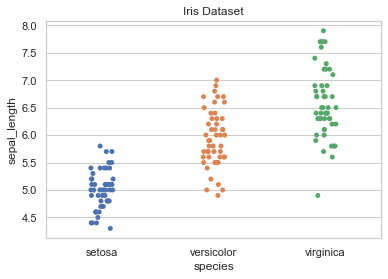

In [7]:
sns.set(style='whitegrid')
iris=sns.load_dataset('iris');
ax = sns.stripplot(x='species',y='sepal_length',data=iris);
plt.title('Iris Dataset')
plt.show()

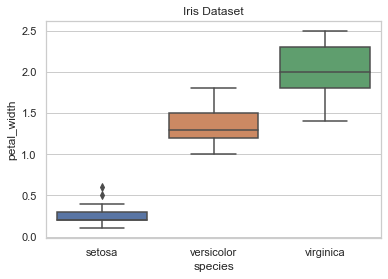

In [8]:
sns.boxplot(x='species',y='petal_width',data=iris)
plt.title("Iris Dataset")
plt.show()

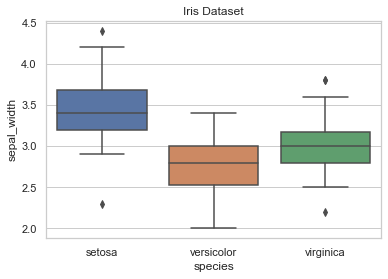

In [17]:
sns.boxplot(x='species',y='sepal_width',data=iris)
plt.title("Iris Dataset")
plt.show()

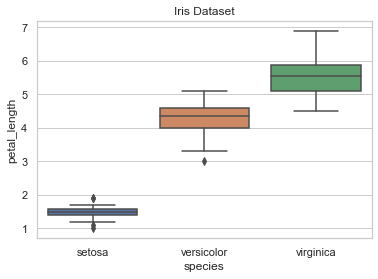

In [18]:
sns.boxplot(x='species',y='petal_length',data=iris)
plt.title("Iris Dataset")
plt.show()

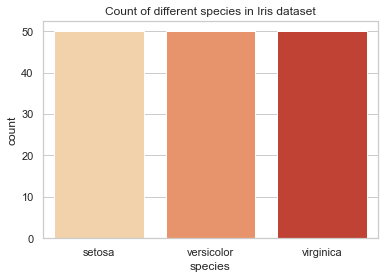

In [9]:
#count plot
sns.countplot(x='species',data=iris,palette="OrRd")
plt.title("Count of different species in Iris dataset")
plt.show()

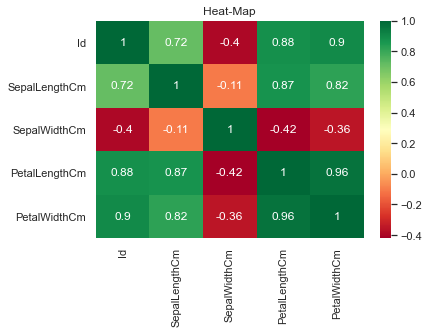

In [10]:
#Heat Map
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
plt.title("Heat-Map")
plt.show()

# Step 3 : Finding the optimum number of clusters using k-means clustering

In [11]:
#Finding the optimum no. of clusters using k-means
x=data.iloc[:,[0,1,2,3]].values
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    ##appending the WCSS to the list (kmeans.inertia_returns the WCSS value for an inirialized cluster)
    wcss.append(kmeans.inertia_)
    print('k:',i,"wcss:",kmeans.inertia_)

k: 1 wcss: 281831.54466666654
k: 2 wcss: 70581.3808
k: 3 wcss: 31320.711199999994
k: 4 wcss: 17758.792503556186
k: 5 wcss: 11468.968747023802
k: 6 wcss: 7921.863473076923
k: 7 wcss: 5911.632365518538
k: 8 wcss: 4541.979023391812
k: 9 wcss: 3571.911095588236
k: 10 wcss: 2943.9331008403374


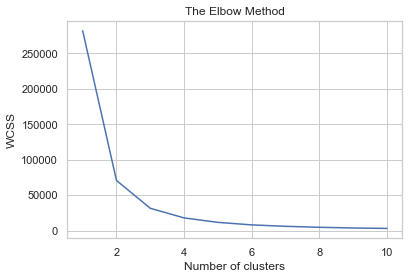

In [12]:
#Plotting the results onto the line graph, allowing us to observe 'The elbow'
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#  Step 4 : Initializing K-Means with Optimum number of clusters# 

In [13]:
#Fitting K-Means to the dataset
kmeans=KMeans(n_clusters = 3, init='k-means++',max_iter=300, n_init=10, random_state=0)
#Returns a label for each data point based on the number of clusters
y_kmeans= kmeans.fit_predict(x)

# Step 5 : Predicting Values

In [14]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Step 6 : Visualizing the Clusters

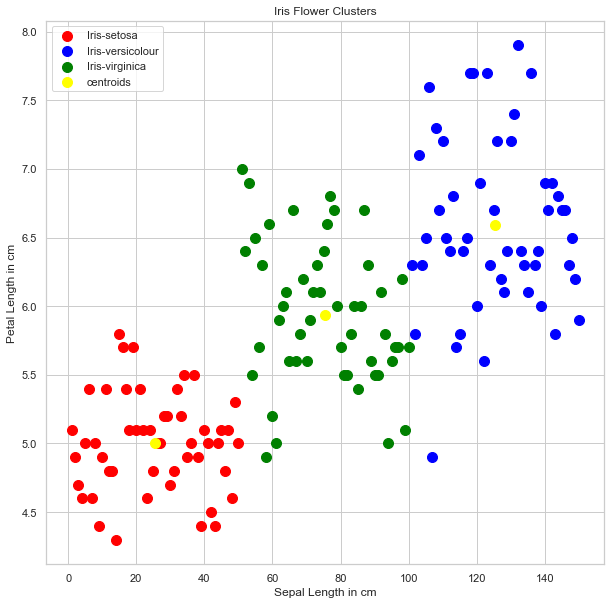

In [15]:
#Visualising the clusters
plt.figure(figsize= (10,10))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100, c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100, c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100, c='green',label='Iris-virginica')

#Plotting the Centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100, c='yellow',label='centroids')
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()
plt.show()